# Retrieval Augmented Generation (RAG)

1. Break documents into chunks of text.
2. Index chunks in a vector database.
3. Search by vector for similar records. (Retrieval, Retrieval can also be done using traditional database searches or web browsing, and in many cases a vector search by semantic similarity is not necessary)
4. Insert records into the prompt as context.


# Embeddings


- Embeddings typically refers to the vector representation of the text returned
  from a pretrained AI model

- OpenAI’s text-embedding-ada-002 has 1,536 dimensions


## Open AI Embeddings


In [35]:
from openai import OpenAI
client = OpenAI()

# Function to get the vector embedding for a given text


def get_vector_embeddings(text):
    response = client.embeddings.create(
        input=text,
        model="text-embedding-ada-002"
    )
    # print(len([r.embedding for r in response.data][0]))  # 1536
    embeddings = [r.embedding for r in response.data]
    return embeddings[0]


get_vector_embeddings("Your text string goes here")

[-0.0069986856542527676,
 -0.005245656240731478,
 0.011908512562513351,
 -0.024931978434324265,
 -0.02470361441373825,
 0.03995027020573616,
 -0.010148766450583935,
 -0.009356209076941013,
 -0.013218247331678867,
 -0.009759203530848026,
 -0.011834629811346531,
 0.007871842011809349,
 -0.01421230286359787,
 0.007750943768769503,
 0.010041301138699055,
 -0.005134832579642534,
 0.022822970524430275,
 -0.0015758797526359558,
 0.015031726099550724,
 -0.010121899656951427,
 0.004785569850355387,
 0.012479422613978386,
 0.00480571947991848,
 0.010672660544514656,
 -0.00644456734880805,
 -0.0004743591125588864,
 0.005588202271610498,
 -0.012553305365145206,
 0.016281012445688248,
 0.004456456750631332,
 0.00668636430054903,
 -0.0069449529983103275,
 -0.015139191411435604,
 -0.006689722649753094,
 -0.01872584968805313,
 0.004103836137801409,
 0.0033196741715073586,
 -0.018981080502271652,
 0.030520180240273476,
 -0.0075897458009421825,
 0.00818080548197031,
 0.009510690346360207,
 -0.0010922852

## Hugging Face Sentence Transformers Library

- Sentence Transformer has 384 dimensions

  https://huggingface.co/sentence-transformers

- `sentence-transformers/all-MiniLM-L6-v2`, which is a smaller version of BERT, an open source NLP modelintroduced by Google in 2017 (based on the transformer model), which is optimized for sentence-level tasks


In [36]:
import requests
import os
from dotenv import load_dotenv
load_dotenv()

model_id = "sentence-transformers/all-MiniLM-L6-v2"
hf_token = os.getenv("HF_TOKEN")

api_url = "https://api-inference.huggingface.co/"
api_url += f"pipeline/feature-extraction/{model_id}"
headers = {"Authorization": f"Bearer {hf_token}"}


def query(texts):
    response = requests.post(api_url, headers=headers,
                             json={"inputs": texts,
                                   "options": {"wait_for_model": True}})
    return response.json()


texts = ["mickey mouse",
         "cheese",
         "trap",
         "rat",
         "ratatouille"
         "bus",
         "airplane",
         "ship"]

output = query(texts)
output

[[-0.03875632584095001,
  0.04480458050966263,
  0.016051093116402626,
  -0.0178909283131361,
  -0.0351855643093586,
  -0.013003019616007805,
  0.14877274632453918,
  0.04880755767226219,
  0.01184836681932211,
  -0.044042523950338364,
  0.033878836780786514,
  -0.021161722019314766,
  -0.03593837842345238,
  -0.004054976161569357,
  0.0226056519895792,
  -0.03249230235815048,
  -0.012720168568193913,
  0.045571863651275635,
  0.008470969274640083,
  -0.03638050705194473,
  -0.034335676580667496,
  -0.0017537899548187852,
  -0.01511224452406168,
  0.013477494940161705,
  -0.0770668163895607,
  0.014443229883909225,
  0.024193651974201202,
  0.010390950366854668,
  -0.059111088514328,
  -0.09692394733428955,
  0.0007171289762482047,
  -0.014247315935790539,
  -0.035656001418828964,
  -0.01907837763428688,
  -0.019614364951848984,
  0.006524048279970884,
  -0.04909475892782211,
  0.04045393317937851,
  -0.0073241847567260265,
  -0.05470050126314163,
  -0.03098735772073269,
  -0.082744874

# Gensim Word2Vec

- good for large corpus


In [37]:
from gensim.models import Word2Vec

# Sample data: list of sentences, where each sentence is
# a list of words.
# In a real-world scenario, you'd load and preprocess your
# own corpus.
sentences = [
    ["the", "cake", "is", "a", "lie"],
    ["if", "you", "hear", "a", "turret", "sing",
        "you're", "probably", "too", "close"],
    ["why", "search", "for", "the", "end", "of", "a",
        "rainbow", "when", "the", "cake", "is", "a", "lie?"],
    ["GLaDOS", "promised", "cake", "but", "all", "I",
        "got", "was", "this", "test", "chamber"],
    ["remember", "when", "the", "platform", "was", "sliding", "into", "the", "fire", "pit", "and", "I", "said", "‘Goodbye’", "and", "you", "were",
        "like", "‘NO WAY!’", "and", "then", "I", "was", "all", "‘I", "was", "just", "pretending", "to", "murder", "you’?", "That", "was", "great"],
    ["the", "cake", "is", "a", "lie", "but", "the",
        "companion", "cube", "is", "forever"],
    ["wheatley", "might", "betray", "you,", "but", "the", "cake", "already", "did"],
    ["if", "life", "gives", "you", "lemons,",
        "don't", "make", "a", "combustible", "lemon"],
    ["there's", "no", "cake", "in", "space,", "just", "ask", "wheatley"],
    ["completing", "tests", "for", "cake", "is", "the", "sweetest", "lie"],
    ["I", "swapped", "the", "cake", "recipe", "with", "a",
        "neurotoxin", "formula,", "hope", "that's", "fine"],
] + [
    ["the", "cake", "is", "a", "lie"],
    ["the", "cake", "is", "definitely", "a", "lie"],
    ["everyone", "knows", "that", "cake", "equals", "lie"],
    ["cake", "and", "lie", "are", "synonymous"],
    ["whenever", "you", "hear", "cake", "think", "lie"],
    ["cake", "?", "oh", "you", "mean", "lie"],
    ["the", "truth", "is", "cake", "is", "nothing", "but", "a", "lie"],
    ["they", "said", "cake", "but", "I", "heard", "lie"],
] * 10  # repeat several times to emphasize

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5,
                 min_count=1, workers=4, seed=36)

# Save the model
model.save("custom_word2vec_model.model")

# To load the model later
# loaded_model = Word2Vec.load("custom_word2vec_model.model")

# Get vector for a word
vector = model.wv['cake']

# Find most similar words
similar_words = model.wv.most_similar("cake", topn=5)
print("Top 5 most similar words to 'cake': ", similar_words)

# Directly query the similarity between "cake" and "lie"
cake_lie_similarity = model.wv.similarity("cake", "lie")
print("Similarity between 'cake' and 'lie': ",
      cake_lie_similarity)

Top 5 most similar words to 'cake':  [('lie', 0.23420444130897522), ('test', 0.23205120861530304), ('tests', 0.17178671061992645), ('GLaDOS', 0.1536172330379486), ('got', 0.14605288207530975)]
Similarity between 'cake' and 'lie':  0.23420443


TD-IDF

- for smaller documents size
- a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents.
- The TF-IDF value increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the wider corpus, which helps to adjust for the fact that some words are generally more common than others.


In [38]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert sentences to a list of strings for TfidfVectorizer
document_list = [' '.join(s) for s in sentences]

# Compute TF-IDF representation
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(document_list)

# Extract the position of the words "cake" and "lie" in
# the feature matrix
cake_idx = vectorizer.vocabulary_['cake']
lie_idx = vectorizer.vocabulary_['lie']

# Extract and reshape the vector for 'cake'
cakevec = tfidf_matrix[:, cake_idx].toarray().reshape(1, -1)

# Compute the cosine similarities
similar_words = cosine_similarity(cakevec, tfidf_matrix.T).flatten()

# Get the indices of the top 6 most similar words
# (including 'cake')
top_indices = np.argsort(similar_words)[-6:-1][::-1]

# Retrieve and print the top 5 most similar words to
# 'cake' (excluding 'cake' itself)
names = []
for idx in top_indices:
    names.append(vectorizer.get_feature_names_out()[idx])
print("Top five most similar words to 'cake': ", names)

# Compute cosine similarity between "cake" and "lie"
similarity = cosine_similarity(np.asarray(tfidf_matrix[:,
                                                       cake_idx].todense()), np.asarray(tfidf_matrix[:, lie_idx].todense()))

# The result will be a matrix; we can take the average or
# max similarity value
avg_similarity = similarity.mean()
print("Similarity between 'cake' and 'lie'", avg_similarity)

# Show the similarity between "cake" and "elephant"
elephant_idx = vectorizer.vocabulary_['sing']
similarity = cosine_similarity(np.asarray(tfidf_matrix[:,
                                                       cake_idx].todense()), np.asarray(tfidf_matrix[:,
                                                                                                     elephant_idx].todense()))

avg_similarity = similarity.mean()
print("Similarity between 'cake' and 'sing'", avg_similarity)

Top five most similar words to 'cake':  ['lie', 'the', 'is', 'you', 'definitely']
Similarity between 'cake' and 'lie' 0.8926458157227388
Similarity between 'cake' and 'sing' 0.010626735901461177


# Memory Retrieval with FAISS


In [39]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=100,  # 100 tokens
    chunk_overlap=20,  # 20 tokens of overlap
)

text = """
Welcome to the "Unicorn Enterprises: Where Magic Happens" Employee Handbook! We're thrilled to have you join our team of dreamers, doers, and unicorn enthusiasts. At Unicorn Enterprises, we believe that work should be as enchanting as it is productive. This handbook is your ticket to the magical world of our company, where we'll outline the principles, policies, and practices that guide us on this extraordinary journey. So, fasten your seatbelts and get ready to embark on an adventure like no other!
Certainly, here are five middle paragraphs for your fake employee handbook:

**1: Our Magical Culture**

At Unicorn Enterprises, we take pride in our unique and enchanting company culture. We believe that creativity and innovation flourish best when people are happy and inspired. From our weekly "Wear Your Favorite Mythical Creature Costume" day on Fridays to our in-house unicorn petting zoo, we aim to infuse magic into every corner of our workplace. So, don't be surprised if you find a fairy tale book in the breakroom or a gnome guiding you to the restroom. Our culture is designed to spark your imagination and encourage collaboration among our magical team.

**2: Unicorn Code of Conduct**

While we embrace creativity, we also value professionalism. Our Unicorn Code of Conduct ensures that we maintain a harmonious and respectful environment. Treating all team members, regardless of their unicorn species, with kindness and respect is essential. We also encourage open communication and constructive feedback because, in our world, every opinion matters, just like every horn on a unicorn's head!

**3: Magical Work-Life Balance**

At Unicorn Enterprises, we understand the importance of maintaining a balanced life. We offer flexible work hours, magical mental health days, and even an on-site wizard to provide stress-relief spells when needed. We believe that a happy and well-rested employee is a creative and productive employee. So, don't hesitate to use our relaxation chambers or join a group meditation session under the office rainbow.

**4: Enchanted Benefits**

Our commitment to your well-being extends to our magical benefits package. You'll enjoy a treasure chest of perks, including unlimited unicorn rides, a bottomless cauldron of coffee and potions, and access to our company library filled with spellbinding books. We also offer competitive health and dental plans, ensuring your physical well-being is as robust as your magical spirit.

**5: Continuous Learning and Growth**

At Unicorn Enterprises, we believe in continuous learning and growth. We provide access to a plethora of online courses, enchanted workshops, and wizard-led training sessions. Whether you're aspiring to master new spells or conquer new challenges, we're here to support your personal and professional development.

As we conclude this handbook, remember that at Unicorn Enterprises, the pursuit of excellence is a never-ending quest. Our company's success depends on your passion, creativity, and commitment to making the impossible possible. We encourage you to always embrace the magic within and outside of work, and to share your ideas and innovations to keep our enchanted journey going. Thank you for being a part of our mystical family, and together, we'll continue to create a world where magic and business thrive hand in hand!
"""

chunks = text_splitter.split_text(text=text)
print(chunks[0:3])

['Welcome to the "Unicorn Enterprises: Where Magic Happens" Employee Handbook! We\'re thrilled to have you join our team of dreamers, doers, and unicorn enthusiasts. At Unicorn Enterprises, we believe that work should be as enchanting as it is productive. This handbook is your ticket to the magical world of our company, where we\'ll outline the principles, policies, and practices that guide us on this extraordinary journey. So, fasten your seatbelts and get ready', 'practices that guide us on this extraordinary journey. So, fasten your seatbelts and get ready to embark on an adventure like no other!', 'Certainly, here are five middle paragraphs for your fake employee handbook:']


In [40]:
import numpy as np
import faiss
# The get_vector_embeddings function is defined in a preceding example
emb = [get_vector_embeddings(chunk) for chunk in chunks]
vectors = np.array(emb)

# Create a FAISS index
index = faiss.IndexFlatL2(vectors.shape[1])
index.add(vectors)

# Function to perform a vector search


def vector_search(query_text, k=1):
    query_vector = get_vector_embeddings(query_text)
    distances, indices = index.search(
        np.array([query_vector]), k)
    return [(chunks[i], float(dist)) for dist,
            i in zip(distances[0], indices[0])]


# Example search
user_query = "do we get free unicorn rides?"
search_results = vector_search(user_query)
print(f"Search results for {user_query}:", search_results)

Search results for do we get free unicorn rides?: [('At Unicorn Enterprises, we take pride in our unique and enchanting company culture. We believe that creativity and innovation flourish best when people are happy and inspired. From our weekly "Wear Your Favorite Mythical Creature Costume" day on Fridays to our in-house unicorn petting zoo, we aim to infuse magic into every corner of our workplace. So, don\'t be surprised if you find a fairy tale book in the breakroom or a gnome guiding you to the restroom. Our culture', 0.3526628911495209)]


In [42]:
# Function to perform a vector search and then ask # GPT-3.5-turbo a question
def search_and_chat(user_query, k=1):
    # Perform the vector search
    search_results = vector_search(user_query, k)
    print(f"Search results: {search_results}\n\n")
    prompt_with_context = f"""Context:{search_results}\
 Answer the question: {user_query}"""

    # Create a list of messages for the chat
    messages = [
        {"role": "system", "content": """Please answer the
 questions provided by the user. Use only the context
 provided to you to respond to the user, if you don't
 know the answer say \"I don't know\"."""},
        {"role": "user", "content": prompt_with_context},
    ]

    # Get the model's response
    response = client.chat.completions.create(
        model="gpt-3.5-turbo", messages=messages)

    # Print the assistant's reply
    print(f"""Response:
 {response.choices[0].message.content}""")


# Example search and chat
search_and_chat("What is Unicorn Enterprises' mission?")

Search results: [("As we conclude this handbook, remember that at Unicorn Enterprises, the pursuit of excellence is a never-ending quest. Our company's success depends on your passion, creativity, and commitment to making the impossible possible. We encourage you to always embrace the magic within and outside of work, and to share your ideas and innovations to keep our enchanted journey going. Thank you for being a part of our mystical family, and together, we'll continue to create a world where magic and business thrive hand in", 0.2570367157459259)]


Response:
 Unicorn Enterprises' mission is to pursue excellence through passion, creativity, and commitment in order to make the impossible possible. They encourage their employees to embrace magic within and outside of work, share ideas, and innovations to create a world where magic and business thrive hand in hand.


In [43]:
import os

# Create the directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Save the index to a file
faiss.write_index(index, "data/my_index_file.index")

In [44]:
# Load the index from a file
index = faiss.read_index("data/my_index_file.index")

In [ ]:
# Assuming index1 and index2 are two IndexFlatL2 indices
index1.add(index2.reconstruct_n(0, index2.ntotal))

# RAG with Langchain


In [46]:
from langchain_community.vectorstores.faiss import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

# 1. Create the documents:
documents = [
    "James Phoenix worked at JustUnderstandingData.",
    "James Phoenix currently is 31 years old.",
    """Data engineering is the designing and building systems for collecting,
 storing, and analyzing data at scale.""",
]

# 2. Create a vectorstore:
vectorstore = FAISS.from_texts(texts=documents, embedding=OpenAIEmbeddings())
retriever = vectorstore.as_retriever()

# 3. Create a prompt:
template = """Answer the question based only on the following context:
---
Context: {context}
---
Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
# 4. Create a chat model:
model = ChatOpenAI()

In [47]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [48]:
chain.invoke("What is data engineering?")

'Data engineering is the designing and building systems for collecting, storing, and analyzing data at scale.'

In [49]:
chain.invoke("Who is James Phoenix?")

'James Phoenix is a 31-year-old individual who worked at JustUnderstandingData.'

In [50]:
chain.invoke("What is the president of the US?")

'There is no information provided in the context about the current president of the US.'

# Hosted Vector Databases with Pinecone


Hosted vector databases offer several advantages over open source local vector stores:

1. Maintainance

- With a hosted vector database, you don’t need to worry about setting up, man‐
  aging, and maintaining the database yourself. This can save significant time
  and resources, especially for businesses that may not have dedicated DevOps or
  database management teams.

2. Scalability

- Hosted vector databases are designed to scale with your needs. As your data
  grows, the database can automatically scale to handle the increased load, ensur‐
  ing that your applications continue to perform efficiently.

3. Reliability

- Managed services typically offer high availability with service-level agreements,
  as well as automatic backups and disaster recovery features. This can provide
  peace of mind and save you from potential data loss.

4. Performance

- Hosted vector databases often have optimized infrastructure and algorithms that
  can provide better performance than self-managed, open source solutions. This
  can be particularly important for applications that rely on real-time or near-realtime vector search capabilities.

5. Support

- With a hosted service, you typically get access to support from the company
  providing the service. This can be very helpful if you experience issues or need
  help optimizing your use of the database.

6. Security

- Managed services often have robust security measures in place to protect your
  data, including things like encryption, access control, and monitoring. Major
  hosted providers are more likely to have the necessary compliance certificates
  and be in compliance with privacy legislation in regions like the EU


In [51]:
from pinecone import Pinecone, ServerlessSpec
from dotenv import load_dotenv
load_dotenv()

index_name = "employee-handbook"
environment = "us-east-1"
pc = Pinecone()  # This reads the PINECONE_API_KEY env var

# Check if index already exists:
# (it shouldn't if this is first time)
if index_name not in pc.list_indexes().names():
    # if does not exist, create index
    pc.create_index(
        index_name,
        # Using the same vector dimensions as text-embedding-ada-002
        dimension=1536,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region=environment),
    )

# Connect to index:
index = pc.Index(index_name)
# View index stats:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

In [52]:
from tqdm import tqdm  # For printing a progress bar
from time import sleep

# How many embeddings you create and insert at once
batch_size = 10
retry_limit = 5  # maximum number of retries

for i in tqdm(range(0, len(chunks), batch_size)):
    # Find end of batch
    i_end = min(len(chunks), i+batch_size)
    meta_batch = chunks[i:i_end]
    # Get ids
    ids_batch = [str(j) for j in range(i, i_end)]
    # Get texts to encode
    texts = [x for x in meta_batch]
    # Create embeddings
    # (try-except added to avoid RateLimitError)
    done = False
    try:
        # Retrieve embeddings for the whole batch at once
        embeds = []
        for text in texts:
            embedding = get_vector_embeddings(text)
            embeds.append(embedding)
        done = True
    except:
        retry_count = 0
        while not done and retry_count < retry_limit:
            try:
                for text in texts:
                    embedding = get_vector_embeddings(text)
                    embeds.append(embedding)
                done = True
            except:
                sleep(5)
                retry_count += 1

    if not done:
        print(f"""Failed to get embeddings after
 {retry_limit} retries.""")
        continue

    # Cleanup metadata
    meta_batch = [{
        'batch': i,
        'text': x
    } for x in meta_batch]
    to_upsert = list(zip(ids_batch, embeds, meta_batch))
    # Upsert to Pinecone
    index.upsert(vectors=to_upsert)

100%|██████████| 2/2 [00:06<00:00,  3.18s/it]


In [58]:
# Retrieve from Pinecone
user_query = "do we get free unicorn rides?"


def pinecone_vector_search(user_query, k):
    xq = get_vector_embeddings(user_query)
    res = index.query(vector=xq, top_k=k, include_metadata=True)
    # res = index.query(vector=xq, filter={
    #     "batch": {"$eq": 1}
    # }, top_k=1, include_metadata=True)
    return res


pinecone_vector_search(user_query, k=1)

{'matches': [{'id': '4',
              'metadata': {'batch': 0.0,
                           'text': 'At Unicorn Enterprises, we take pride in '
                                   'our unique and enchanting company culture. '
                                   'We believe that creativity and innovation '
                                   'flourish best when people are happy and '
                                   'inspired. From our weekly "Wear Your '
                                   'Favorite Mythical Creature Costume" day on '
                                   'Fridays to our in-house unicorn petting '
                                   'zoo, we aim to infuse magic into every '
                                   "corner of our workplace. So, don't be "
                                   'surprised if you find a fairy tale book in '
                                   'the breakroom or a gnome guiding you to '
                                   'the restroom. Our culture'},
     

# Self-Querying


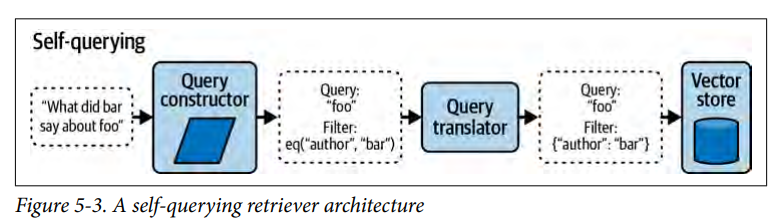


[Self-querying](https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/self_query/) yields several significant benefits:

1. Schema definition
   You can establish a schema reflecting anticipated user descriptions, enabling a
   structured understanding of the information sought by users.

2. Dual-layer retrieval
   The retriever performs a two-tier operation. First, it gauges the semantic simi‐
   larity between the user’s input and the database’s contents. Simultaneously, it
   discerns and applies filters based on the metadata of the stored documents or
   rows, ensuring an even more precise and relevant retrieval.


In [80]:
from langchain_core.documents import Document
from langchain_community.vectorstores.chroma import Chroma
from langchain_openai import OpenAIEmbeddings
import lark
import getpass
import os
import warnings
# Disabling warnings:
warnings.filterwarnings("ignore")

In [81]:
docs = [
    Document(
        page_content="A tale about a young wizard and his journey in a magical school.",
        metadata={
            "title": "Harry Potter and the Philosopher's Stone",
            "author": "J.K. Rowling",
            "year_published": 1997,
            "genre": "Fiction",
            "isbn": "978-0747532699",
            "publisher": "Bloomsbury",
            "language": "English",
            "page_count": 223,
            "summary": "The first book in the Harry Potter series where Harry discovers his magical heritage.",
            "rating": 4.8,
        },
    ),
    Document(
        page_content="An epic tale of power, betrayal and love set in a fantastical world.",
        metadata={
            "title": "A Game of Thrones",
            "author": "George R.R. Martin",
            "year_published": 1996,
            "genre": "Fantasy",
            "isbn": "978-0553103540",
            "publisher": "Bantam",
            "language": "English",
            "page_count": 694,
            "summary": "The first book in A Song of Ice and Fire series, introducing the intricate world of Westeros.",
            "rating": 4.6,
        },
    ),
    Document(
        page_content="A futuristic society where firemen burn books to maintain order.",
        metadata={
            "title": "Fahrenheit 451",
            "author": "Ray Bradbury",
            "year_published": 1953,
            "genre": "Science Fiction",
            "isbn": "978-1451673319",
            "publisher": "Simon & Schuster",
            "language": "English",
            "page_count": 249,
            "summary": "In a future society, books are banned and firemen are tasked to burn any they find, leading one fireman to question his role.",
            "rating": 4.4,
        },
    ),
    Document(
        page_content="A young woman's life in the South during the Civil War and Reconstruction.",
        metadata={
            "title": "Gone with the Wind",
            "author": "Margaret Mitchell",
            "year_published": 1936,
            "genre": "Historical Fiction",
            "isbn": "978-0684830681",
            "publisher": "Macmillan",
            "language": "English",
            "page_count": 1037,
            "summary": "The tale of Scarlett O'Hara and her love affair with Rhett Butler, set against the backdrop of the American Civil War.",
            "rating": 4.3,
        },
    ),
    Document(
        page_content="A story about a hobbit's journey to destroy a powerful ring.",
        metadata={
            "title": "The Lord of the Rings",
            "author": "J.R.R. Tolkien",
            "year_published": 1954,
            "genre": "Fantasy",
            "isbn": "978-0618640157",
            "publisher": "Houghton Mifflin",
            "language": "English",
            "page_count": 1216,
            "summary": "The epic tale of Frodo Baggins and his quest to destroy the One Ring, accompanied by a group of diverse companions.",
            "rating": 4.7,
        },
    ),
]

In [82]:
from langchain_openai.chat_models import ChatOpenAI
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain.chains.query_constructor.base import AttributeInfo

# Create the embeddings and vectorstore:
embeddings = OpenAIEmbeddings()
vectorstore = Chroma.from_documents(docs, OpenAIEmbeddings())

# Basic Info
basic_info = [
    AttributeInfo(name="title", description="The title of the book",
                  type="string"),
    AttributeInfo(name="author", description="The author of the book",
                  type="string"),
    AttributeInfo(
        name="year_published",
        description="The year the book was published",
        type="integer",
    ),
]

# Detailed Info
detailed_info = [
    AttributeInfo(
        name="genre", description="The genre of the book",
        type="string or list[string]"
    ),
    AttributeInfo(
        name="isbn",
        description="The International Standard Book Number for the book",
        type="string",
    ),
    AttributeInfo(
        name="publisher",
        description="The publishing house that published the book",
        type="string",
    ),
    AttributeInfo(
        name="language",
        description="The primary language the book is written in",
        type="string",
    ),
    AttributeInfo(
        name="page_count", description="Number of pages in the book",
        type="integer"
    ),
]

# Analysis
analysis = [
    AttributeInfo(
        name="summary",
        description="A brief summary or description of the book",
        type="string",
    ),
    AttributeInfo(
        name="rating",
        description="""An average rating for the book (from reviews), ranging
 from 1-5""",
        type="float",
    ),
]

# Combining all lists into metadata_field_info
metadata_field_info = basic_info + detailed_info + analysis

In [83]:
document_content_description = "Brief summary of a movie"
llm = ChatOpenAI(temperature=0)
retriever = SelfQueryRetriever.from_llm(
    llm, vectorstore, document_content_description, metadata_field_info
)

# Looking for sci-fi books
retriever.invoke("What are some sci-fi books?")

[Document(metadata={'author': 'Ray Bradbury', 'genre': 'Science Fiction', 'isbn': '978-1451673319', 'language': 'English', 'page_count': 249, 'publisher': 'Simon & Schuster', 'rating': 4.4, 'summary': 'In a future society, books are banned and firemen are tasked to burn any they find, leading one fireman to question his role.', 'title': 'Fahrenheit 451', 'year_published': 1953}, page_content='A futuristic society where firemen burn books to maintain order.'),
 Document(metadata={'author': 'Ray Bradbury', 'genre': 'Science Fiction', 'isbn': '978-1451673319', 'language': 'English', 'page_count': 249, 'publisher': 'Simon & Schuster', 'rating': 4.4, 'summary': 'In a future society, books are banned and firemen are tasked to burn any they find, leading one fireman to question his role.', 'title': 'Fahrenheit 451', 'year_published': 1953}, page_content='A futuristic society where firemen burn books to maintain order.'),
 Document(metadata={'author': 'Ray Bradbury', 'genre': 'Science Fiction'

In [84]:
# Querying for a book by J.K. Rowling:
retriever.invoke(
    '''I want some books that are published by the
 author J.K.Rowling'''
)

[Document(metadata={'author': 'J.K. Rowling', 'genre': 'Fiction', 'isbn': '978-0747532699', 'language': 'English', 'page_count': 223, 'publisher': 'Bloomsbury', 'rating': 4.8, 'summary': 'The first book in the Harry Potter series where Harry discovers his magical heritage.', 'title': "Harry Potter and the Philosopher's Stone", 'year_published': 1997}, page_content='A tale about a young wizard and his journey in a magical school.'),
 Document(metadata={'author': 'J.K. Rowling', 'genre': 'Fiction', 'isbn': '978-0747532699', 'language': 'English', 'page_count': 223, 'publisher': 'Bloomsbury', 'rating': 4.8, 'summary': 'The first book in the Harry Potter series where Harry discovers his magical heritage.', 'title': "Harry Potter and the Philosopher's Stone", 'year_published': 1997}, page_content='A tale about a young wizard and his journey in a magical school.'),
 Document(metadata={'author': 'J.K. Rowling', 'genre': 'Fiction', 'isbn': '978-0747532699', 'language': 'English', 'page_count':

In [85]:
retriever = SelfQueryRetriever.from_llm(
    llm,
    vectorstore,
    document_content_description,
    metadata_field_info,
    enable_limit=True,
)

retriever.get_relevant_documents(
    query="Return 2 Fantasy books",
)

[Document(metadata={'author': 'George R.R. Martin', 'genre': 'Fantasy', 'isbn': '978-0553103540', 'language': 'English', 'page_count': 694, 'publisher': 'Bantam', 'rating': 4.6, 'summary': 'The first book in A Song of Ice and Fire series, introducing the intricate world of Westeros.', 'title': 'A Game of Thrones', 'year_published': 1996}, page_content='An epic tale of power, betrayal and love set in a fantastical world.'),
 Document(metadata={'author': 'George R.R. Martin', 'genre': 'Fantasy', 'isbn': '978-0553103540', 'language': 'English', 'page_count': 694, 'publisher': 'Bantam', 'rating': 4.6, 'summary': 'The first book in A Song of Ice and Fire series, introducing the intricate world of Westeros.', 'title': 'A Game of Thrones', 'year_published': 1996}, page_content='An epic tale of power, betrayal and love set in a fantastical world.')]

Alternative Retrieval Mechanisms
When it comes to retrieval implementations, various intriguing methods each
demonstrate their distinct approaches, advantages, and limitations:


1. MultiQueryRetriever

- The [MultiQueryRetriever](https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/MultiQueryRetriever/) aims to overcome the limitations of distance-based
  retrieval by generating multiple queries from different perspectives for a given
  user input query. This leads to the generation of a larger set of potentially
  relevant documents, offering broader insights. However, challenges may arise if
  the different queries produce contradicting results or overlap.
  Contextual Compression
  The Contextual Compression Retriever handles long documents by compressing
  irrelevant parts, ensuring relevance to context. The challenge with this method is
  the expertise needed to determine the relevance and importance of information.

2. Contextual Compression

- The [Contextual Compression Retriever](https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/contextual_compression/) handles long documents by compressing
  irrelevant parts, ensuring relevance to context. The challenge with this method is
  the expertise needed to determine the relevance and importance of information.

3. Ensemble Retriever

- The [Ensemble Retriever](https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/ensemble/) uses a list of retrievers and combines their results. It’s
  essentially a “hybrid” search methodology that leverages the strengths of various
  algorithms. However, the Ensemble Retriever implies more computational work‐
  load due to the use of multiple retrieval algorithms, potentially affecting retrieval speed.

4. Parent Document Retriever

- The [Parent Document Retriever](https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/parent_document_retriever/) ensures the maintenance of rich document back‐
  grounds by retrieving original source documents from which smaller chunks are
  derived. But it might increase computational requirements due to the retrieval of
  larger parent documents.

4. Time-Weighted Vector Store Retriever

- The [Time-Weighted Vector Store Retriever](https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/time_weighted_vectorstore/) incorporates time decay into docu‐
  ment retrieval. Despite its advantages, the time decay factor might cause over‐
  looking of relevant older documents, risking the loss of historical context.
